## Taking a look at the Enron labeled data

In [1]:
import numpy as np
import pandas as pd
import vocab as vocabulary
import collections
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from wordcloud import WordCloud ,STOPWORDS

In [2]:
import glob
import fileinput
import shutil

In [3]:
basedir = "/data/SuperMod/enron_with_categories"

In [4]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

In [6]:
testfile = "/data/SuperMod/enron_with_categories/1/82353.txt"
testlabel = "/data/SuperMod/enron_with_categories/1/82353.cats"
with open(testfile, 'r') as readfile:
    sample = readfile.read()
with open(testlabel, 'r') as readlabel:
    samplelabel = readlabel.read()
print(sample)
print("""""""""""""""""")
print(samplelabel)

Message-ID: <3524436.1075863727537.JavaMail.evans@thyme>
Date: Tue, 12 Feb 2002 05:07:17 -0800 (PST)
From: m..presto@enron.com
To: fgiffels@hgp-inc.com
Subject: RE: Confidential Contact data and RFI
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Presto, Kevin M. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=KPRESTO>
X-To: 'Fred W. Giffels' <fgiffels@HGP-Inc.com>
X-cc: 
X-bcc: 
X-Folder: \Kevin_Presto_Mar2002_1\Presto, Kevin M.\Sent Items
X-Origin: Presto-K
X-FileName: kpresto (Non-Privileged).pst

Any nuclear specific info?
 

Kevin Presto 
UBS Warburg Energy 
kevin.presto@ubswenergy.com 
Phone:  713-853-5035 
Fax:  713-646-8272 

-----Original Message-----
From: Fred W. Giffels [mailto:fgiffels@HGP-Inc.com]
Sent: Tuesday, February 12, 2002 7:04 AM
To: Presto, Kevin M.
Cc: Dan Salter
Subject: Re: Confidential Contact data and RFI


Confidential
Kevin
I know you would not bid the entire 1000Mwe, we are trying to come up with a proxy to assist in 

In [8]:
outfilename =   basedir + '/combined_email_label.txt'  

with open(outfilename, 'wb') as outfile:
    for i in range(7):
        folder = i + 1
        folder_add = basedir + '/' + str(folder)

        filenames = glob.glob(folder_add + '/*.txt')


        for filename  in filenames:

            ids = filename[37:-4]
            label_filename = filename[:-4] + '.cats'

            with open(label_filename, 'rb') as readfile:
                outfile.write(str.encode(filename[37:-4]))        
                shutil.copyfileobj(readfile, outfile)

            
 

In [9]:
train = pd.read_csv(outfilename)

,1/2290241,1,1.1
0,3,8,1
1,1/2190481,1,1
2,2,1,1
3,2,2,1
4,2,13,1
5,3,10,1
6,4,10,1
7,1/1739601,1,1
8,2,1,1
9,2,2,1


In [21]:
# for line in fileinput.input(glob.glob("*.txt")):
#     outfile.write(line)
    
outfilename =   basedir + '/combined_email.txt'  

# with open(outfilename, 'wb') as outfile:
    
# #     for fname in filenames:
# #         with open(fname, 'r') as readfile:
# #             infile = readfile.read()
# #             for line in infile:
# #                 outfile.write(line)
# #             outfile.write("\n\n")    
    
    for i in range(7):
        folder = i + 1
        folder_add = basedir + '/' + str(folder)

        filenames = glob.glob(folder_add + '/*.txt')
  
        
        for filename  in filenames:
            if filename == outfilename:
                # don't want to copy the output into the output
                continue     
            with open(filename, 'rb') as readfile:
                shutil.copyfileobj(readfile, outfile)
                outfile.write(str.encode('\t' + filename[37:-4]))
                outfile.write(str.encode("\n\n"))
            
            
#             outfile.write(file +'/t'+ name[37:-4])
#             outfile.write("\n\n")
            
            
# # #     outfile.write(line)

    
# # #     for fname in filenames:
# # #         with open(fname, 'r') as readfile:
# # #             infile = readfile.read()
# # #             for line in infile:
# # #                 outfile.write(line)
# # #             outfile.write("\n\n")    
    
# #     for f in filenames:
# #         print(f[37:-4])



# with open(outfilename, 'wb') as outfile:
#     for filename in glob.glob('*.txt'):
#         if filename == outfilename:
#             # don't want to copy the output into the output
#             continue
#         with open(filename, 'rb') as readfile:
#             shutil.copyfileobj(readfile, outfile)

In [19]:
train = pd.read_csv(outfilename)

ParserError: Error tokenizing data. C error: Expected 2 fields in line 31, saw 4


In [32]:
train = pd.read_csv('/data/SuperMod/2018-E-c-En-train.txt',delimiter="\t")
test = pd.read_csv('/data/SuperMod/2018-E-c-En-test.txt',delimiter="\t")
dev = pd.read_csv('/data/SuperMod/2018-E-c-En-dev.txt',delimiter="\t")

In [33]:
train.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0


In [34]:
dev.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-00866,"@RanaAyyub @rajnathsingh Oh, hidden revenge an...",1,0,1,0,0,0,0,0,0,0,0
1,2018-En-02590,I'm doing all this to make sure you smiling do...,0,0,0,0,1,1,1,0,0,0,0
2,2018-En-03361,if not then #teamchristine bc all tana has don...,1,0,1,0,0,0,0,0,0,0,0
3,2018-En-03230,It is a #great start for #beginners to jump in...,0,0,0,0,1,0,1,0,0,0,0
4,2018-En-01143,My best friends driving for the first time wit...,0,0,0,1,0,0,0,0,0,0,0


In [35]:
train.iloc[:,2:].sum(axis=0)

anger           2544
anticipation     978
disgust         2602
fear            1242
joy             2477
love             700
optimism        1984
pessimism        795
sadness         2008
surprise         361
trust            357
dtype: int64

In [36]:
train.iloc[2,1]

"@Max_Kellerman  it also helps that the majority of NFL coaching is inept. Some of Bill O'Brien's play calling was wow, ! #GOPATS"

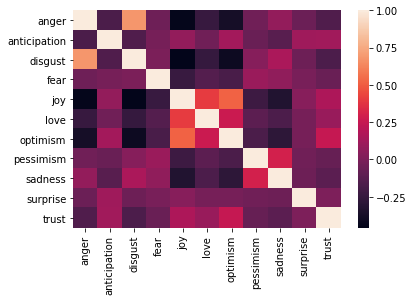

In [37]:
ax = sns.heatmap(train.iloc[:,2:].corr(method='pearson'))

In [38]:
## Joy, love, optimism are very closely related to each other
## disgust and anger very close
## sadness and pessimism very close

### The original combined classes are joy, anger, fear, sadness
It might make sense to limit to only those 4 classes

In [43]:
def toxicwordcloud(subset, title = "Words Frequented"):
    stopword=set(STOPWORDS)
    text=subset.Tweet
    wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
    wc.generate(" ".join(text))
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [45]:
toxicwordcloud(train['anger']==1)

AttributeError: 'Series' object has no attribute 'Tweet'